In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
df = pd.read_csv('NKI_cleaned.csv')
df.head(20)

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
5,s127,23,42,0,5.037645,2.743326,1,0,1,1,...,-0.417534,-0.141338,-0.492190,0.090633,-0.169754,-0.220211,-0.429283,-0.042797,-0.394709,-0.390144
6,s128,24,50,0,8.739220,8.739220,1,1,0,1,...,0.086751,-0.144424,-0.778273,0.024693,0.204909,-0.043497,-0.172939,-0.013997,-0.437534,0.255511
7,s129,25,43,0,7.567420,7.567420,1,0,0,1,...,-0.003150,0.043824,0.442394,-0.498541,-0.231900,0.029205,-0.078742,-0.241568,-0.841080,-0.680880
8,s130,26,47,0,7.296372,7.296372,1,0,0,1,...,-0.362921,-0.038672,-0.647650,-0.760694,0.146781,0.038366,-0.127822,-0.058059,-1.041802,-0.130038
9,s131,27,39,1,4.662560,1.114305,0,0,0,1,...,-0.845758,0.635155,-0.235659,-0.396895,-0.474251,-0.298208,-0.531806,0.091948,-0.605779,-0.607580


In [3]:
# subset data (without uninterpretable features)
features_to_drop = df.columns[17:]
df = df.drop(features_to_drop, axis=1)
df.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode,esr1
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274,-0.413955
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275,0.195251
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276,0.596177
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277,0.501286
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278,-0.066771


<AxesSubplot:xlabel='eventdeath', ylabel='count'>

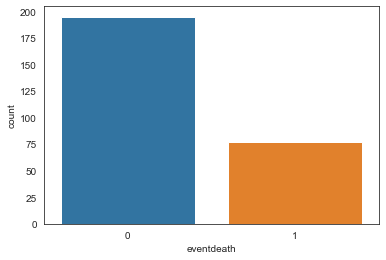

In [6]:
# visualizing event variable
sns.countplot(x="eventdeath", data=df)

In [4]:
df.drop(['Patient', 'ID', 'timerecurrence', 'barcode'], axis = 1, inplace = True)

In [5]:
df.head()

,age,eventdeath,survival,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,esr1
0,43,0,14.817248,0,0,1,1,25,0,2,3,1,-0.413955
1,48,0,14.261465,0,0,0,1,20,0,3,3,1,0.195251
2,38,0,6.644764,0,0,0,1,15,0,2,1,1,0.596177
3,50,0,7.748118,0,1,0,1,15,1,2,3,1,0.501286
4,38,0,6.436687,0,0,1,1,15,0,2,2,1,-0.066771


In [44]:
df.isnull().sum()

age               0
eventdeath        0
survival          0
chemo             0
hormonal          0
                 ..
Contig29014_RC    0
Contig46616_RC    0
NM_000888         0
NM_000898         0
AF067420          0
Length: 1567, dtype: int64

In [5]:
# creating survival dataset
from sksurv.datasets import get_x_y

X, y = get_x_y(df, attr_labels=['eventdeath','survival'], pos_label=True, survival=True)

In [6]:
# Saving feature names for later use
X_list = list(X.columns)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=8)

print(f'training samples: {len(y_train)}')
print(f'validation samples: {len(y_val)}')

training samples: 217
validation samples: 55


In [33]:
# how many of our patients were censored
n_censored = y.shape[0] - y["eventdeath"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

71.7% of records are censored


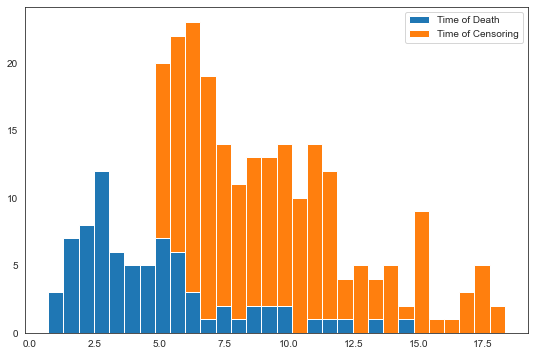

In [35]:
# visualizing distribution of our events (death) and censoring over time
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((y["survival"][y["eventdeath"]],
                               y["survival"][~y["eventdeath"]]),
                              bins=30, stacked=True)
_ = plt.legend(patches, ["Time of Death", "Time of Censoring"])

# Random Forest Survival

https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full

https://scikit-survival.readthedocs.io/en/stable/user_guide/random-survival-forest.html

In [14]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.compare import compare_survival
from sksurv.metrics import (concordance_index_censored,
                            concordance_index_ipcw,
                            cumulative_dynamic_auc)
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import KFold
import eli5
from eli5.sklearn import PermutationImportance

In [11]:
rsf = RandomSurvivalForest(n_estimators=1000, #default 100
                           min_samples_split=10, #default 6
                           min_samples_leaf=15, #default 3
                           #max_features="None", #auto , sqrt, log2
                           n_jobs=-1,
                           random_state=8)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=8)

In [12]:
# CI score
rsf.score(X_val, y_val)

0.76775956284153

In [61]:
# eil5 feature importance
perm = PermutationImportance(rsf, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.0834 ± 0.0927,esr1
0.0342 ± 0.0802,grade
0.0332 ± 0.0285,diam
0.0250 ± 0.0120,angioinv
0.0165 ± 0.0147,age
0.0089 ± 0.0124,amputation
0.0061 ± 0.0070,posnodes
0.0036 ± 0.0031,lymphinfil
0 ± 0.0000,histtype
-0.0001 ± 0.0021,hormonal


In [13]:
# calculating our cumulative dynammic auc
times = np.arange(1.1, 13, 1.1)


rsf_chf_funcs = rsf.predict_cumulative_hazard_function(
    X_val, return_array=False)
rsf_risk_scores = np.row_stack([chf(times) for chf in rsf_chf_funcs])

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(
    y_train, y_val, rsf_risk_scores, times
)

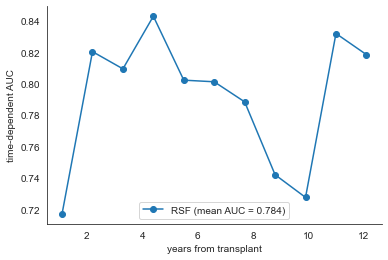

In [19]:
# plotting the time-dependent auc 
fig, ax = plt.subplots()
plt.plot(times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
plt.xlabel("years from transplant")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [65]:
# evaluating role of n_estimators on c-index
scores_rsf_CI = {}

rsf_CI = RandomSurvivalForest(n_jobs=-1,
                           random_state=8)
for i in range(1, 250):
    n_estimators = i * 5
    rsf_CI.set_params(n_estimators=n_estimators)
    rsf_CI.fit(X_train, y_train)
    scores_rsf_CI[n_estimators] = rsf_CI.score(X_val, y_val)

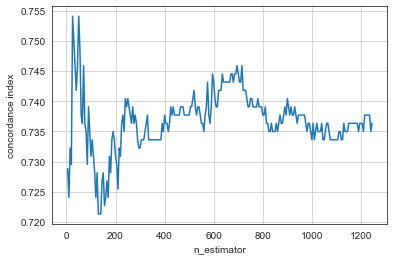

In [66]:
# plotting the effect of n_estimators on c-index
x, y = zip(*scores_rsf_CI.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

## Random Forest Survival Grid Search 

In [11]:
rsf2 = RandomSurvivalForest(n_jobs=-1,
                           random_state=8)

In [12]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['eventdeath'], y['survival'], prediction)
    return result[0]

In [15]:
param_grid = {'n_estimators': [750, 1000, 1250], 
              'max_features': [None, "auto", "sqrt" , "log2"], 
              }
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=8)
gcv = GridSearchCV(rsf2, param_grid, scoring=score_survival_model,
                   n_jobs=-1, refit=False,
                   cv=cv)

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
gcv = gcv.fit(X, y)

In [17]:
round(gcv.best_score_, 3), gcv.best_params_

(0.73, {'max_features': 'auto', 'n_estimators': 750})

In [18]:
results_df = pd.DataFrame(gcv.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
auto_750,"{'max_features': 'auto', 'n_estimators': 750}",1,0.729752,0.065410
sqrt_750,"{'max_features': 'sqrt', 'n_estimators': 750}",1,0.729752,0.065410
log2_750,"{'max_features': 'log2', 'n_estimators': 750}",1,0.729752,0.065410
auto_1250,"{'max_features': 'auto', 'n_estimators': 1250}",4,0.729658,0.065837
sqrt_1250,"{'max_features': 'sqrt', 'n_estimators': 1250}",4,0.729658,0.065837
log2_1250,"{'max_features': 'log2', 'n_estimators': 1250}",4,0.729658,0.065837
auto_1000,"{'max_features': 'auto', 'n_estimators': 1000}",7,0.729599,0.065531
sqrt_1000,"{'max_features': 'sqrt', 'n_estimators': 1000}",7,0.729599,0.065531
log2_1000,"{'max_features': 'log2', 'n_estimators': 1000}",7,0.729599,0.065531


In [37]:
rsf3 = RandomSurvivalForest(n_estimators=750, #default 100
                           min_samples_split=10, #default 6
                           min_samples_leaf=15, #default 3
                           max_features= 'auto',
                           n_jobs=-1,
                           random_state=8)
rsf3.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=750, n_jobs=-1, random_state=8)

In [38]:
# CI score
rsf3.score(X_val, y_val)

0.7650273224043715

# Gradient Boosted Models

In [40]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

## Gradient Boosting Survival Analysis uses regression tree based learner

In [21]:
# Loss functions include coxph (default) , squared , ipcwls (Only default works on our dataset)
est_cph_tree = GradientBoostingSurvivalAnalysis(
    loss = 'coxph', n_estimators=100, learning_rate=1.0, max_depth=1, random_state=8
)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_val, y_val)
print(round(cindex, 3))

0.703


In [13]:
# evaluating role of n_estimators on c-index
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(
    learning_rate=1.0, max_depth=1, random_state=8
)
for i in range(1, 250):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_val, y_val)

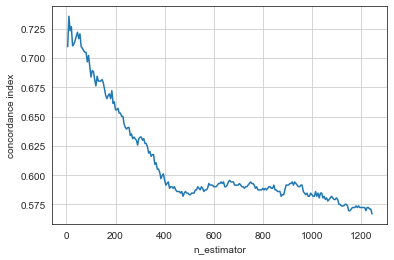

In [14]:
# plotting the effect of n_estimators on c-index
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [15]:
# looking at tighter range for our effect of n_estimators on c-index 
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(
    learning_rate=1.0, max_depth=1, random_state=8
)
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_val, y_val)

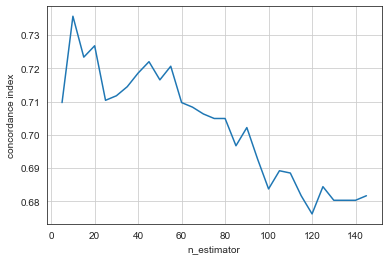

In [16]:
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [24]:
# calculating our cumulative dynammic auc
times = np.arange(1.1, 13, 1.1)


est_cph_tree_funcs = est_cph_tree.predict_cumulative_hazard_function(
    X_val)
est_cph_tree_risk_scores = np.row_stack([chf(times) for chf in est_cph_tree_funcs])

est_cph_tree_auc, est_cph_tree_mean_auc = cumulative_dynamic_auc(
    y_train, y_val, est_cph_tree_risk_scores, times
)

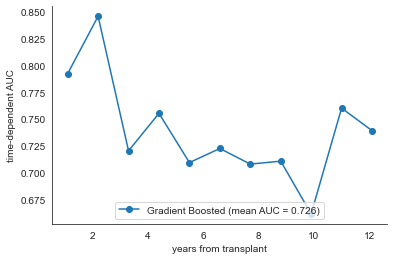

In [26]:
# plotting the time-dependent auc
fig, ax = plt.subplots()
plt.plot(times, est_cph_tree_auc, "o-", label="Gradient Boosted (mean AUC = {:.3f})".format(est_cph_tree_mean_auc))
plt.xlabel("years from transplant")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [27]:
# eli5 feature importance
perm = PermutationImportance(est_cph_tree, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.1123 ± 0.0857,grade
0.0856 ± 0.0803,esr1
0.0403 ± 0.0419,diam
0.0253 ± 0.0350,age
0.0202 ± 0.0117,angioinv
0.0128 ± 0.0128,posnodes
0.0081 ± 0.0124,amputation
0 ± 0.0000,hormonal
0 ± 0.0000,chemo
-0.0061 ± 0.0116,histtype


## Component Wise Gradient Boosting Analysis uses component-wise least squares base learner

In [20]:
# evaluating role of n_estimators on c-index
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(
    learning_rate=1.0, random_state=8
)
for i in range(1, 51):
    n_estimators = i * 10
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(X_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(X_val, y_val)

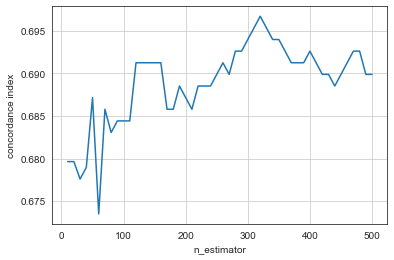

In [21]:
# plotting effect of n_estimators on c-index
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

In [22]:
# eli5 feature importance
perm = PermutationImportance(est_cph_ls, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.1902 ± 0.1542,grade
0.0271 ± 0.0279,diam
0.0147 ± 0.0271,posnodes
0.0142 ± 0.0222,chemo
0.0141 ± 0.0282,age
0.0027 ± 0.0060,hormonal
0.0009 ± 0.0029,angioinv
0.0008 ± 0.0120,histtype
-0.0009 ± 0.0159,amputation
-0.0322 ± 0.0438,lymphinfil


## Regularization of our Gradient Boosted model

In [32]:
n_estimators = [i * 5 for i in range(1, 21)]

estimators = {
    "no regularization": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, max_depth=1, random_state=0
    ),
    "learning rate": GradientBoostingSurvivalAnalysis(
        learning_rate=0.1, max_depth=1, random_state=0
    ),
    "dropout": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, dropout_rate=0.1, max_depth=1, random_state=0
    ),
    "subsample": GradientBoostingSurvivalAnalysis(
        learning_rate=1.0, subsample=0.5, max_depth=1, random_state=0
    ),
}

scores_reg = {k: [] for k in estimators.keys()}
for n in n_estimators:
    for name, est in estimators.items():
        est.set_params(n_estimators=n)
        est.fit(X_train, y_train)
        cindex = est.score(X_val, y_val)
        scores_reg[name].append(cindex)

scores_reg = pd.DataFrame(scores_reg, index=n_estimators)

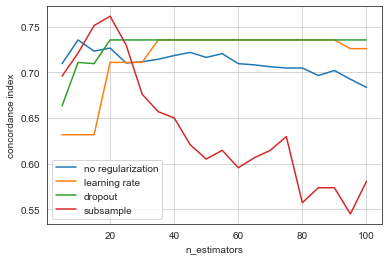

In [33]:
ax = scores_reg.plot(xlabel="n_estimators", ylabel="concordance index")
ax.grid(True)

## Combining regularization on Gradient Boosted model

In [41]:
class EarlyStoppingMonitor:

    def __init__(self, window_size, max_iter_without_improvement):
        self.window_size = window_size
        self.max_iter_without_improvement = max_iter_without_improvement
        self._best_step = -1

    def __call__(self, iteration, estimator, args):
        # continue training for first self.window_size iterations
        if iteration < self.window_size:
            return False

        # compute average improvement in last self.window_size iterations.
        # oob_improvement_ is the different in negative log partial likelihood
        # between the previous and current iteration.
        start = iteration - self.window_size + 1
        end = iteration + 1
        improvement = np.mean(estimator.oob_improvement_[start:end])

        if improvement > 1e-6:
            self._best_step = iteration
            return False  # continue fitting

        # stop fitting if there was no improvement
        # in last max_iter_without_improvement iterations
        diff = iteration - self._best_step
        return diff >= self.max_iter_without_improvement


est_early_stopping = GradientBoostingSurvivalAnalysis(
    n_estimators=1000, learning_rate=0.05, subsample=0.5,
    max_depth=1, random_state=8
)

monitor = EarlyStoppingMonitor(25, 50)

est_early_stopping.fit(X_train, y_train, monitor=monitor)

print("Fitted base learners:", est_early_stopping.n_estimators_)

cindex = est_early_stopping.score(X_val, y_val)
print("Performance on test set", round(cindex, 3))

Fitted base learners: 178
Performance on test set 0.732


# Survival Support Vector Machines

In [42]:
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM, FastKernelSurvivalSVM
from sklearn.model_selection import GridSearchCV, ShuffleSplit

## Linear SVM

In [29]:
est_fastSVM = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=8)

est_fastSVM.fit(X_train, y_train)
cindex = est_fastSVM.score(X_val, y_val)
print(round(cindex, 3))

0.716


In [30]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(est_fastSVM, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.1446 ± 0.1308,grade
0.0823 ± 0.0758,esr1
0.0202 ± 0.0184,age
0.0179 ± 0.0153,angioinv
0.0051 ± 0.0133,chemo
0.0036 ± 0.0058,diam
0.0035 ± 0.0091,posnodes
-0.0005 ± 0.0080,histtype
-0.0018 ± 0.0313,amputation
-0.0019 ± 0.0046,hormonal


## Optimizing Linear Survival SVM

In [37]:
estimator = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=8)

In [38]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['eventdeath'], y['survival'], prediction)
    return result[0]

In [39]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=100, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model,
                   n_jobs=4, cv=cv)

In [41]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
gcv = gcv.fit(X, y)

In [42]:
round(gcv.best_score_, 3), gcv.best_params_

(0.739, {'alpha': 0.0009765625})

In [43]:
estimator.set_params(**gcv.best_params_)
estimator.fit(X, y)

FastSurvivalSVM(alpha=0.0009765625, max_iter=1000, optimizer='avltree',
                random_state=8, tol=1e-05)

## Non-linear (kernel) SVM

In [43]:
from sksurv.kernels import clinical_kernel
from sksurv.svm import FastKernelSurvivalSVM

In [50]:
fastKSVM = FastKernelSurvivalSVM(optimizer="rbtree", kernel="linear", random_state=8)

fastKSVM.fit(X_train, y_train)
cindex = fastKSVM.score(X_val, y_val)
print(round(cindex, 3))

0.766


In [55]:
# eli5 feature importance
perm = PermutationImportance(fastKSVM, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.0968 ± 0.1311,grade
0.0218 ± 0.0372,esr1
0.0148 ± 0.0173,age
0.0115 ± 0.0249,angioinv
0.0090 ± 0.0118,diam
0.0053 ± 0.0070,chemo
0.0025 ± 0.0090,posnodes
0.0011 ± 0.0053,hormonal
0.0005 ± 0.0026,amputation
-0.0005 ± 0.0016,histtype


## Optimizing Linear kernel

In [ ]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['eventdeath'], y['survival'], prediction)
    return result[0]

In [53]:
ksvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="linear", random_state=8)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=8)
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}

kgcv = GridSearchCV(ksvm, param_grid, scoring=score_survival_model,
                    n_jobs=4, cv=cv)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kgcv = kgcv.fit(X, y)

In [54]:
round(kgcv.best_score_, 3), kgcv.best_params_

(0.713, {'alpha': 0.0625})

In [56]:
fastKSVM = FastKernelSurvivalSVM(optimizer="rbtree", kernel="linear", alpha = 0.0625, random_state=8)

fastKSVM.fit(X_train, y_train)
cindex = fastKSVM.score(X_val, y_val)
print(round(cindex, 3))

0.766


## Optimizing RBF Kernel 

In [ ]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['eventdeath'], y['survival'], prediction)
    return result[0]

In [51]:
ksvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="rbf", random_state=8)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=8)
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2), 'gamma': 10. ** np.arange(-1, 0, 1)}

kgcv = GridSearchCV(ksvm, param_grid, scoring=score_survival_model,
                    n_jobs=4, cv=cv)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kgcv = kgcv.fit(X, y)

In [52]:
round(kgcv.best_score_, 3), kgcv.best_params_

(0.653, {'alpha': 0.000244140625, 'gamma': 0.1})

## Optimizing Clinical Kernel

In [50]:


kernel_matrix = clinical_kernel(X)

ksvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="precomputed", random_state=8)

param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
kgcv = GridSearchCV(ksvm, param_grid, scoring=score_survival_model,
                    n_jobs=4, cv=cv)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kgcv = kgcv.fit(kernel_matrix, y)

In [51]:
round(kgcv.best_score_, 3), kgcv.best_params_

(0.747, {'alpha': 0.00390625})